# Analyze the Income Gap between Female and Male Employees

## Introduction

This assignment is developed based on the three datasets collected from Kaggle.com at: https://www.kaggle.com/theoviel/kagglers-gender-pay-gap-salary-prediction. You may refer the website for explanation, cleaning, visualization, and basic analysis of the datasets. The three datasets: surveySchema.csv, freeFormResponses.csv, multipleChoiceResponses.csv.

## Tasks

### Complete the following tasks:

1. Calculate the median income of male employees and the median income of female employee in the population. (look the set of all employees in the datasets as the population).(1 point)

2. Draw an overlaid graph to show the histograms of the incomes of female and male employees in the population. (You create one histogram for male, and another histogram for female, but the two histograms will be displayed in the same graph with different colors). (1 point)

3. Use the random sampling, empirical distribution, sample comparison, bootstrap, hypothesis testing as well as A/B testing we discussed in the class to analyze the income gap between female and male employees.

 - Select a sample from the population. Make sure your sample include 500 employees selected from the population, and consider how to ensure the sampling strategy is fair since the datasets include overwhelmed male employees than female employees (1 point).

 - Define test statistic, null hypothesis and alternative hypothesis (1 point).

 - Draw the income histogram for the sample, calculate the median income of the sample, and draw a red dot and a yellow dot of the female median income and male median income of the population, respectively, in the histogram (1 point).

 - Draw the histogram of the test statistic of the sample, and draw a red dot to show the corresponding test statistic of the population (e.g. the difference of the median incomes between female and male employees) in the diagram (1 point).

 - Write a procedure to use bootstrap to produce at least 5000 samples (1 point).

 - Draw the histogram of the test statistic of the bootstrap samples (1 point).

 - Define confidence interval and P-value to validate the hypothesis you defined (2 points).
 

4. Submit Python code, the writing for explaining the data cleaning procedure, defining the test statistic, hypothesises, random sampling, bootstrap, confidential intervals, P-vales, as well as interpretation of your results, and all outputs described above.


## Task 1
1. Calculate the median income of male employees and the median income of female employee in the population. (look the set of all employees in the datasets as the population).(1 point)
 - 1.1 Import necessary packages
 - 1.2 Load Data
 - 1.3 Isolate Data for gender and income
 - 1.4 Find Median

In [38]:
from datascience import Table # Including Table functions from datascience package into the running instance
import os# including os package into running instance
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from datascience.predicates import are# Import 'are' from 'predicates' in 'datascience' module for comparison

#---------------------------------------------------------------------------------------------------------------------

#LOAD DATA

#---------------------------------------------------------------------------------------------------------------------


#Loading data from CSV file URL address 
InputFilepath='https://raw.githubusercontent.com/babloomarkose/DataInPython/master/SamplingAndTestingHypothesis'
SurveyResponse=Table().read_table(InputFilepath+'/multipleChoiceResponses.csv')

#Relabel columns of interest
SurveyResponse.relabel('Q1','Gender')
SurveyResponse.relabel('Q1_OTHER_TEXT','GenderDescription')  
SurveyResponse.relabel('Q2','Above17')
SurveyResponse.relabel('Q6','CurrentRole')
SurveyResponse.relabel('Q9','Compensation')

#Select data columns of interest
SurveyResponse=SurveyResponse.select('Gender','GenderDescription','Compensation','Above17','CurrentRole')
#Print the Response Table
print("The raw response Table:1st 5 rows ")
SurveyResponse.show(5) # Show only the first 5 records

#Remove first row describing the data in each column
SurveyResponse = SurveyResponse.exclude(0)



The raw response Table:1st 5 rows 


Gender,GenderDescription,Compensation,Above17,CurrentRole
What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe - Text,What is your current yearly compensation (approximate $USD)?,What is your age (# years)?,Select the title most similar to your current role (or m ...
Female,-1,nan,45-49,Consultant
Male,-1,"10-20,000",30-34,Other
Female,-1,"0-10,000",30-34,Data Scientist
Male,-1,nan,35-39,Not employed


In [ ]:

#---------------------------------------------------------------------------------------------------------------------

#EXPLORATORY DATA ANALYSIS

#---------------------------------------------------------------------------------------------------------------------

print("Number of Records : " ,  SurveyResponse.num_rows)
print("Number of Variables : ",SurveyResponse.num_columns)
print("Variables : ",SurveyResponse.labels)

#Find Number of Missing Values in each column
print("\nCOUNT OF MISSING VALUES IN EACH COLUMN")

print("Missing Values in Gender : ",(SurveyResponse['Gender'] == 'nan').sum())
print("Missing Values in Gender Description : ",(SurveyResponse['GenderDescription'] == 'nan').sum())
print("Missing Values in Compensation : ",(SurveyResponse['Compensation'] == 'nan').sum())
print("Missing Values in Above17 : ",(SurveyResponse['Above17'] == 'nan').sum())
print("Missing Values in CurrentRole : ",(SurveyResponse['CurrentRole'] == 'nan').sum())

#Count The number of Unique Values in string variables
print("\nCOUNT OF EACH UNIQUE VALUE IN EACH COLUMN")
print('\nGender:',Counter(SurveyResponse['Gender'] ))
print('\nGender Description: ',Counter(SurveyResponse['GenderDescription'] ))
print('\nCompensation: ',Counter(SurveyResponse['Compensation'] ))
print('\nAbove17:',Counter(SurveyResponse['Above17'] ))
print('\nCurrentRole: ',Counter(SurveyResponse['CurrentRole'] ))

pandasDF=SurveyResponse.to_df()
#Data Cleaning : Remove rows with missing values for Compensation 
                 # and where value of compensation is I do not wish to disclose my approximate yearly compensation
                 
indexNames = pandasDF[ pandasDF['Compensation'] == 'nan' ].index
pandasDF.drop(indexNames , inplace=True)
indexNames = pandasDF[ pandasDF['Compensation'] == 'I do not wish to disclose my approximate yearly compensation' ].index
pandasDF.drop(indexNames , inplace=True)
indexNames = pandasDF[ pandasDF['Gender'] == 'Prefer not to say' ].index
pandasDF.drop(indexNames , inplace=True)
indexNames = pandasDF[ pandasDF['Gender'] == 'Prefer to self-describe' ].index
pandasDF.drop(indexNames , inplace=True)
indexNames = pandasDF[ pandasDF['CurrentRole'] == 'Student' ].index
pandasDF.drop(indexNames , inplace=True)
indexNames = pandasDF[ pandasDF['CurrentRole'] == 'Not employed' ].index
pandasDF.drop(indexNames , inplace=True)

indexNames = pandasDF[ pandasDF['Compensation'] == '500,000+' ].index
pandasDF.drop(indexNames , inplace=True)

SurveyResponse1=Table.from_df(pandasDF)
#Everyone is above 17 so droping the column
SurveyResponse1=SurveyResponse1.drop("Above17")
SurveyResponse1=SurveyResponse1.drop("GenderDescription")


SurveyResponse1=SurveyResponse1.drop("CurrentRole")

#Replace the compensation range string to integer, with the mean of the range
SurveyResponse1['Compensation'] = SurveyResponse1.apply(lambda x: '500000' if x=='500,000+' else x,'Compensation')
SurveyResponse1['Compensation'] = SurveyResponse1.apply(lambda x: x.replace('-', '000-'),'Compensation')
SurveyResponse1['Compensation'] = SurveyResponse1.apply(lambda x: x.replace(',', ''),'Compensation')
SurveyResponse1['Compensation'] = SurveyResponse1.apply(lambda x: np.mean([int(i) for i in x.split('-')]),'Compensation')

#Print the Response Table
print("The Cleaned response Table:1st 5 rows ")
SurveyResponse1.show(5) # Show only the first 5 records

Female=SurveyResponse1.where('Gender',"Female")
Male=SurveyResponse1.where('Gender',"Male")

#Count The number of Unique Values in string variables
print("\nCOUNT OF EACH UNIQUE VALUE IN EACH COLUMN")
print('\nGender:',Counter(SurveyResponse1['Gender'] ))
print('\nCompensation: ',Counter(SurveyResponse1['Compensation'] ))

#---------------------------------------------------------------------------------------------------------------------

#Calculate Median

#---------------------------------------------------------------------------------------------------------------------
PopulationMedianCompensation = np.median(SurveyResponse1.column('Compensation'))
MaleMedianCompensation = np.median(Male.column('Compensation'))
FemaleMedianCompensation = np.median(Female.column('Compensation'))
DifferenceFemaleToMalePopulation=FemaleMedianCompensation-MaleMedianCompensation
print("The median Compensation of the population is: ",np.median(SurveyResponse1.column('Compensation')))
print("The median Compensation of the Females in population is: ",np.median(Female.column('Compensation')))
print("The median Compensation of the Males in population is: ",np.median(Male.column('Compensation')))
print("The difference between median Compensation of the Females to Males in population is: ",DifferenceFemaleToMalePopulation)



## Task 2
2. Draw an overlaid graph to show the histograms of the incomes of female and male employees in the population. (You create one histogram for male, and another histogram for female, but the two histograms will be displayed in the same graph with different colors). (1 point)
 - 2.1 Generate Histogram for Males and Females
 - 2.2 Overlay and display both


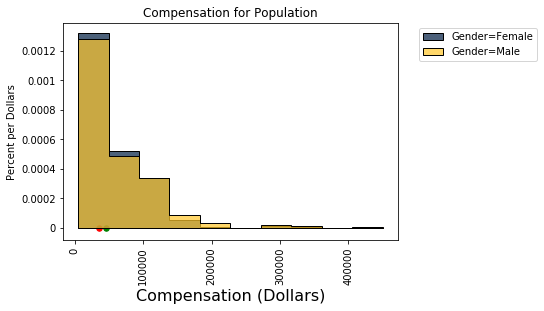

In [49]:
%matplotlib inline
'''compensation_bins1 = np.arange(0, 100001, 10000)
compensation_bins2 = np.append(compensation_bins1,np.arange(100001, 150001, 25000))
compensation_bins3 = np.append(compensation_bins2,np.arange(150001, 350001, 50000))
compensation_bins =  np.append(compensation_bins3,np.arange(300001, 600001, 100000))
SurveyResponse1.hist('Compensation', bins = compensation_bins, unit ='Dollars',group="Gender")
plt.scatter(FemaleMedianCompensation, 0, color='red', s=30)
plt.scatter(MaleMedianCompensation, 0, color='green', s=30)'''
SurveyResponse1.hist('Compensation', unit ='Dollars',group="Gender")
plt.title('Compensation for Population');
plt.scatter(FemaleMedianCompensation, 0, color='red', s=30)
plt.scatter(MaleMedianCompensation, 0, color='green', s=30)

## Task 3
Use the random sampling, empirical distribution, sample comparison, bootstrap, hypothesis testing as well as A/B testing we discussed in the class to analyze the income gap between female and male employees.

 - Select a sample from the population. Make sure your sample include 500 employees selected from the population, and consider how to ensure the sampling strategy is fair since the datasets include overwhelmed male employees than female employees (1 point).

 - Define test statistic, null hypothesis and alternative hypothesis (1 point).

 - Draw the income histogram for the sample, calculate the median income of the sample, and draw a red dot and a yellow dot of the female median income and male median income of the population, respectively, in the histogram (1 point).

 - Draw the histogram of the test statistic of the sample, and draw a red dot to show the corresponding test statistic of the population (e.g. the difference of the median incomes between female and male employees) in the diagram (1 point).

 - Write a procedure to use bootstrap to produce at least 5000 samples (1 point).

 - Draw the histogram of the test statistic of the bootstrap samples (1 point).

 - Define confidence interval and P-value to validate the hypothesis you defined (2 points).

In [50]:
#Select a sample from the population. 
#Make sure your sample include 500 employees selected from the population, 
#and consider how to ensure the sampling strategy is fair since the datasets
#include overwhelmed male employees than female employees (1 point).

# To ensure fairness, need to maintain  the male to female ratio of the population in the sample



def MakeSample(SurveyResponse1,n):
    samplesize=n
    #Access the original population counts
    GenderCounter=Counter(SurveyResponse1['Gender'] ) 
    #Male to female ratio in the population
    ratioMaleToFemale=round(GenderCounter['Male']/GenderCounter['Female'])
    #The sample of 500 needs to maintain the ratio of male to female from the population
    numberofFemales = round(samplesize/(ratioMaleToFemale+1))
    numberofMales = samplesize-numberofFemales
    #Random sample of males
    malePopulation=SurveyResponse1.where("Gender", "Male")
    #Random sample of females
    FemalePopulation=SurveyResponse1.where("Gender", "Female")
    #Random sample with same male to female proportion as population
    Sample=malePopulation.sample(k=numberofMales).append(FemalePopulation.sample(k=numberofFemales))
    return(Sample)
    
Sample500=MakeSample(SurveyResponse1,500)
SampleMedianCompensation = np.median(Sample500.column('Compensation'))
FemaleSample=Sample500.where('Gender',"Female")
MaleSample=Sample500.where('Gender',"Male")
SampleFemaleMedianCompensation = np.median(FemaleSample.column('Compensation'))
SampleMaleMedianCompensation = np.median(MaleSample.column('Compensation'))
print("The median Compensation of the Sample is: ",SampleMedianCompensation)
print("The median Compensation of the Females in Sample is: ",SampleFemaleMedianCompensation)
print("The median Compensation of the Males in Sample is: ",SampleMaleMedianCompensation)
print("The Difference in median Compensation of the Females to males in Sample is: ",SampleFemaleMedianCompensation-SampleMaleMedianCompensation)




The median Compensation of the Sample is:  45000.0
The median Compensation of the Females in Sample is:  35000.0
The median Compensation of the Males in Sample is:  45000.0
The Difference in median Compensation of the Females to males in Sample is:  -10000.0


### Define test statistic, null hypothesis and alternative hypothesis (1 point).

 - Null Hypothesis:Median Income of Male and female are same
 - Alternative Hypothesis:Median Income of Male and Female differ considerably
 - Test Statistics: We are going to simulate the median compensation of a random sample of size 500 drawn from the population of survey responses.
  -  We will do absolute value of Female Median Compensation -Male Median compensation, 

### Histogram for sample
 - Draw the income histogram for the sample
 - Calculate the median income of the sample
 - Draw a red dot and a yellow dot of the female median income and male median income of the population,  respectively, in the histogram (1 point).

The median Compensation of the Females in Sample is:  35000.0
The median Compensation of the Males in Sample is:  45000.0


"plt.scatter(SampleFemaleMedianCompensation, 0, color='green', s=35)\nplt.scatter(SampleMaleMedianCompensation, 0, color='blue', s=35)"

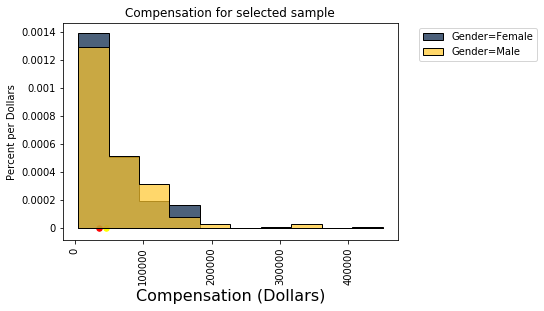

In [51]:
Sample500 = MakeSample(SurveyResponse1,500)
Sample500.hist('Compensation', unit ='Dollars',group='Gender')
plt.title('Compensation for selected sample');
FemaleSample=Sample500.where('Gender',"Female")
MaleSample=Sample500.where('Gender',"Male")
SampleFemaleMedianCompensation = np.median(FemaleSample.column('Compensation'))
SampleMaleMedianCompensation = np.median(MaleSample.column('Compensation'))

print("The median Compensation of the Females in Sample is: ",SampleFemaleMedianCompensation)
print("The median Compensation of the Males in Sample is: ",SampleMaleMedianCompensation)

plt.scatter(FemaleMedianCompensation, 0, color='red', s=30)
plt.scatter(MaleMedianCompensation, 0, color='yellow', s=30)
'''plt.scatter(SampleFemaleMedianCompensation, 0, color='green', s=35)
plt.scatter(SampleMaleMedianCompensation, 0, color='blue', s=35)'''

### Histogram of the Test statistic of the sample
 - Draw the histogram of the test statistic of the sample, and 
 - Draw a red dot to show the corresponding test statistic of the population (e.g. the difference of the median incomes between female and male employees) in the diagram (1 point).

In [ ]:
%matplotlib inline
#A method to compute difference in median compensation for male and female
def difference_of_medians(table, label, group_label):
    reduced = table.select(label, group_label)
    medians_table = reduced.group(group_label, np.median)
    medians = medians_table.column(1)
    return abs(medians.item(1) - medians.item(0))
difference_of_medians(SurveyResponse1, 'Compensation', 'Gender')

#Predicting the Statistic Under the Null Hypothesis(no difference in compensation)
# no differrnce implies male or female doesnot make a difference in compensation and hence shuffling gender


#A method to compute difference in median compensation after shuffling gender

def one_simulated_difference(table, label, group_label):
    shuffled_labels = table.sample(with_replacement = False).column(group_label)
    shuffled_table = table.select(label).with_column('Shuffled Label', shuffled_labels)
    return difference_of_medians(shuffled_table, label, 'Shuffled Label') 

'''one_simulated_difference(SurveyResponse1, 'Compensation', 'Gender')
'''

#An Array to hold the median compensation difference for n samples
differences = np.array([])
#Number of simulations
repetitions = 5000
# Simulate n time for understanding the variability
for i in np.arange(repetitions):
    new_difference = one_simulated_difference(SurveyResponse1, 'Compensation', 'Gender')
    differences = np.append(differences, new_difference) 
    
# Plot a histogram to understand the spread of difference in median and mark population observed difference    
Table().with_column('Difference Between Group Medians', differences).hist()
print('Observed Difference:', abs(DifferenceFemaleToMalePopulation))
plt.title('Prediction Under the Null Hypothesis');

The histogram above shows the distribution of these 5,000 values. It is the empirical distribution of the test statistic simulated under the null hypothesis. This is a prediction about the test statistic, based on the null hypothesis.

Notice how the distribution is centered around 0. This makes sense, because under the null hypothesis the two groups should have roughly the same average. Therefore the difference between the group averages should be around 0.

The observed difference in the original sample is about  1000, which doesn't even appear on the horizontal scale of the histogram. The observed value of the statistic and the predicted behavior of the statistic under the null hypothesis are inconsistent.

The conclusion of the test is that the data favor the alternative over the null. The average birth weight of babies born to mothers who smoke is less than the average birth weight of babies born to non-smokers.

If you want to compute an empirical P-value, remember that low values of the statistic favor the alternative hypothesis.
#### Bootstrap
 - Write a procedure to use bootstrap to produce at least 5000 samples (1 point).
  -  Take a sample
  -  Use the sample to resample
  -  Repeat resampling

In [151]:


def bootstrap_median(sample, Compensation, replications):
    """Returns an array of bootstrapped sample medians:
    original_sample: table containing the original sample
    label: label of column containing the variable
    replications: number of bootstrap samples
    """
    column_one = sample.select(Compensation)
    medians = np.array([])
    for i in np.arange(replications):
        bootstrap_sample = column_one.sample()
        resampled_median = np.percentile(5, bootstrap_sample.column(0))
        medians = np.append(medians, resampled_median)
        
    return medians

sample= MakeSample(SurveyResponse1,500)
(bootstrap_median(sample, 'Compensation', 10)).hist()
                     

ValueError: Percentiles must be in the range [0, 100]

  -  Draw the histogram of the test statistic of the bootstrap samples (1 point).

  -  Define confidence interval and P-value to validate the hypothesis you defined (2 points).
## Task 4
Submit Python code, the writing for explaining the data cleaning procedure, defining the test statistic, hypothesises, random sampling, bootstrap, confidential intervals, P-vales, as well as interpretation of your results, and all outputs described above.

In [ ]:
'''print(SurveyResponse1.group('Gender'))
SurveyResponse1.hist('Compensation', group = 'Gender')
median_table = SurveyResponse1.group('Gender', np.median)
print(median_table)
medians = median_table.column(1)
observed_difference = medians.item(0) - medians.item(1)
print(observed_difference)
def difference_of_medians(table, label, group_label):
    reduced = table.select(label, group_label)
    medians_table = reduced.group(group_label, np.median)
    medians = medians_table.column(1)
    return medians.item(0) - medians.item(1)
observed_difference2 = difference_of_medians(SurveyResponse1, 'Compensation', 'Gender')
print(observed_difference2)

shuffled_labels = SurveyResponse1.sample(with_replacement = False).column(0)
original_and_shuffled = SurveyResponse1.with_column('Shuffled Label', shuffled_labels)
print(original_and_shuffled)
shuffled_only = original_and_shuffled.drop('Gender')
shuffled_group_medians = shuffled_only.group('Shuffled Label', np.median)
print(shuffled_group_medians)
observed_difference3 = difference_of_medians(original_and_shuffled, 'Compensation', 'Shuffled Label')
print(observed_difference3)'''
'''medians=list()
for i in np.arange(10):
    medians=MakeSample(SurveyResponse1,500)
    mediansSAMPLE = np.append(mediansPOPULATION,medians[0])
    mediansFEMALE = np.append(mediansPOPULATION,medians[1])
    mediansMALE = np.append(mediansPOPULATION,medians[2])
'''
'''from datascience import util #Utilities package 
#A method to compute difference in median compensation for male and female
def ComputeSampleMedianDifference(SurveyResponse1,n):
    samplesize=n
    #Access the original population counts
    GenderCounter=Counter(SurveyResponse1['Gender'] ) 
    #Male to female ratio in the population
    ratioMaleToFemale=round(GenderCounter['Male']/GenderCounter['Female'])
    #The sample of 500 needs to maintain the ratio of male to female from the population
    numberofFemales = round(samplesize/(ratioMaleToFemale+1))
    numberofMales = samplesize-numberofFemales
    #Random sample of males
    malePopulation=SurveyResponse1.where("Gender", "Male")
    #Random sample of females
    FemalePopulation=SurveyResponse1.where("Gender", "Female")
    #Random sample with same male to female proportion as population
    Sample=malePopulation.sample(k=numberofMales).append(FemalePopulation.sample(k=numberofFemales))
    FemaleSample=Sample.where('Gender',"Female")
    MaleSample=Sample.where('Gender',"Male")
    SampleFemaleMedianCompensation = np.median(FemaleSample.column('Compensation'))
    SampleMaleMedianCompensation = np.median(MaleSample.column('Compensation'))
    SampleMedianDifference=SampleFemaleMedianCompensation-SampleMaleMedianCompensation
    return(SampleMedianDifference)

#An Array to hold the median compensation difference for n samples
SampleMedianDifferenceArray=np.array([])

#Compute difference in median compensation for 5000 samples
for i in range(5000):
    SampleMedianDifferenceArray= np.append(SampleMedianDifferenceArray,ComputeSampleMedianDifference(SurveyResponse1,500))

#Plot the difference in median compensation for 5000 samples
Table().with_column('Difference Between Group Medians', SampleMedianDifferenceArray).hist()
print('Observed Difference:', DifferenceFemaleToMalePopulation)

#Plot the difference in median compensation for population on the above scatter 
plt.scatter(DifferenceFemaleToMalePopulation, 0, color='red', s=30)
plt.title('Prediction Under the Null Hypothesis for 5000 Samples')
'''